# Marlow Case - TripleTen DS Sprint 6 Project: 
# Analyzing the Impact of External Factors on Ride Sharing Services #

 # Table of Contents #
 <a id='contents'></a>
 
 - [1. Introduction](#introduction)
 - [2. Data Exploration](#data_explorations)
 - [3. Data Preprocessing](#processing)
 - [4. Exploratory Data Analysis (EDA)](#eda)
     - [Top 10 Companies in Chicago](#top_10)
     - [Top 10 Visited Neighborhoods in Chicago](#10_visits)
 - [5. Hypothesis Testing](#h_testing)
 - [6. Conclusion](#conclusion)

## Introduction ##
<a id='introduction'></a>
________________________________________________________________________________________________________________________________

This project aims to perform an analysis for a new ride-sharing company launching in Chicago. We are aimed to use available online information to form a database; then analysis will be conducted to understand passenger preferences and the impact of external factors, such as weather, on rides. 

### Purpose ###
This project aims to answer specifically the following questions:
- What are the top 10 neighborhoods in terms of drop-offs?
- Does weather condition have an impact on ride-sharing service usage?

One hypothesis has been provided to test the impact of weather: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Data Exploration ##
<a id='data_explorations'></a>
________________________________________________________________________________________________________________________________

We have constructed 2 csvs containing the online data:

- CSV 1: "/datasets/project_sql_result_01.csv"
- CSV 2: "/datasets/project_sql_result_04.csv"

CSV 1 contains the following information:
- `company_name`: taxi company name
- `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.

CSV 2 contains the following information:
- `dropoff_location_name`: Chicago neighborhoods where rides ended
- `average_trips`: the average number of rides that ended in each neighborhood in November 2017

We have consstructed another CSV that will be useful in our hypothesis testing:

CSV 3: "/datasets/project_sql_result_07.csv"

CSV 3 contains the following information:
- `start_ts`: pickup date and time
- `weather_conditions`: weather conditions at the moment the ride started
- `duration_seconds`: ride duration in seconds

Please see the SQL portion of the project for the formulation of these datasets. 

In [2]:
# Load the three datasets
filepath = r"C:\Users\marlo\OneDrive\Desktop\Python_Work\Tripleten_Lessons\Sprint_6_Project"

try:
    company_data = pd.read_csv(f"{filepath}\\moved_project_sql_result_01.csv")
    dropoff_data = pd.read_csv(f"{filepath}\\moved_project_sql_result_04.csv")
    trip_data = pd.read_csv(f"{filepath}\\moved_project_sql_result_07.csv")
except:
    company_data = pd.read_csv("/datasets/project_sql_result_01.csv")
    dropoff_data = pd.read_csv("/datasets/project_sql_result_04.csv")
    trip_data = pd.read_csv("/datasets/project_sql_result_07.csv")

company_data.name = 'Company Data'
dropoff_data.name = 'Drop-off Data'
trip_data.name = 'Trip Data'

In [3]:
# Create function for EDA
# Warning: If you use a df that's not listed in the cell above, you will need to create a name for it
def EDA_DF(df):
    print(f"{df.name} Information:\n")
    df.info()
    print("\n")
    
    print(f"{df.name} 5-Row Preview:\n")
    print(df.head())
    print("\n")
    
    print(f"{df.name} Unique Value Analysis:\n")
    for column in df.columns:
        print(f"Unique values in {column}: \n\n {df[column].unique()} \n")
    print()
    
    print(f"{df.name} Duplicate Check:\n")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")
    print("\n")
    
    print(f"{df.name} Numerical Data:\n")
    print(df.describe())
    

In [4]:
EDA_DF(company_data)

Company Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Company Data 5-Row Preview:

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


Company Data Unique Value Analysis:

Unique values in company_name: 

 ['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasin' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 

**Notes:**
- Data types look good and there are no missing values.
- Data is neatly sorted.
- There are no anomalous values.

In [5]:
# Let's look at dropoff_data
EDA_DF(dropoff_data)

Drop-off Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Drop-off Data 5-Row Preview:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Drop-off Data Unique Value Analysis:

Unique values in dropoff_location_name: 

 ['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'We

**Notes:**
- There are 94 rows of data and each column has 94 non-null values; **no missing values**.
- The `average_trips` column's data-type is float. Since this represents the average number of rides, we can not have a fraction of a ride, so we will need to round this value accordingly and change to int. 
    - **Round `average_trips` and change to `int`**
- No anomalous values in `dropoff_location`
- In `average_trips` we are seeing scientific notation due to the float64 data-type. This is inconvenient, but there does not appear to be any anomalous values here. We already plan to correct this data type.
- No duplicate values.
- Descriptive data looks good.
- Data is neatly sorted.

In [6]:
# Let's look at trip_data
EDA_DF(trip_data)

Trip Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Trip Data 5-Row Preview:

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


Trip Data Unique Value Analysis:

Unique values in start_ts: 

 ['2017-11-25 16:00:00' '2017-11-25 14:00:00' '2017-11-25 12:00:00'
 '2017-11-04 10:00:00' '2017-11-11 07:00:00' '2017-

**Notes:**
- There are 1068 rows of data and each column has 1068 non-null values; **no missing values**
- Since `duration_seconds` is already rounded to the nearest second, we can convert this to `int`.
- `start_ts` represents the pickup date and time, this needs to be converted to `datetime`
    - **Convert `duration_seconds` to `int` and `start_ts` to `datetime`**
- No anomalous values in `start_ts` or `weather_conditions`, but **`duration_seconds` does contain 0 second rides**. Most likely representing cancelled rides. We will need to investigate this issue. 
- There are **197 duplicate rows**
    - **Investigate 0 second rides and 197 duplicate rows**
    
[Back to Contents](#contents)

## Data Preprocessing ##
<a id='processing'></a>
________________________________________________________________________________________________________________________________

Let's summarize our notes for `dropoff_data`:
- **Round average_trips and change to int**

In [7]:
# Round average_trips and correct data-type
dropoff_data['average_trips'] = dropoff_data['average_trips'].round().astype('int')
dropoff_data['average_trips'].head()

0    10727
1     9524
2     6665
3     5164
4     2547
Name: average_trips, dtype: int32

In [8]:
# Rerun EDA
EDA_DF(dropoff_data)

Drop-off Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


Drop-off Data 5-Row Preview:

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9524
2         Streeterville           6665
3             West Loop           5164
4                O'Hare           2547


Drop-off Data Unique Value Analysis:

Unique values in dropoff_location_name: 

 ['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Tow

Data looks great. The mean is significantly larger than the median which tells us there is a **right-skew**.

Let's summarize our notes for `trip_data`:
- **Convert `duration_seconds` to `int`** 
- **Convert `start_ts` to `datetime`**
- **Investigate 197 duplicate rows**
- **Investigate 0 second rides**

In [9]:
# Convert duration_seconds to int
trip_data['duration_seconds'] = trip_data['duration_seconds'].astype('int')
trip_data.head(3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543


In [10]:
# Convert start_ts to datetime
trip_data['start_ts'] = pd.to_datetime(trip_data['start_ts'], format = "%Y-%m-%d %H:%M:%S")

# check
trip_data.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int32
dtype: object

In [11]:
# Investigate duplicate rows
trip_dups = trip_data[trip_data.duplicated()]

# Select random row to investigate
trip_dups.sample(random_state=1)

,start_ts,weather_conditions,duration_seconds
403,2017-11-11 14:00:00,Good,2400


In [12]:
trip_data.query("start_ts == '2017-11-11 14:00:00' and duration_seconds == 2400")

,start_ts,weather_conditions,duration_seconds
366,2017-11-11 14:00:00,Good,2400
403,2017-11-11 14:00:00,Good,2400
637,2017-11-11 14:00:00,Good,2400
755,2017-11-11 14:00:00,Good,2400
1019,2017-11-11 14:00:00,Good,2400


Since `start_ts` has been rounded to the nearest hour and `duration_seconds` were rounded to the nearest second in the initial dataset, we do not have enough evidence to conclude that these are true duplicate values as they very well could have been separate rides. Therefore, we will leave in these duplicate values. 

In [13]:
# Investigate 0-second rides
sec_0_rides = trip_data.query("duration_seconds == 0")
sec_0_rides

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0
168,2017-11-11 07:00:00,Good,0
204,2017-11-18 19:00:00,Good,0
552,2017-11-04 01:00:00,Good,0
801,2017-11-04 09:00:00,Good,0
1063,2017-11-25 11:00:00,Good,0


Since these appear to simply be cancelled rides, and there are only 6 of them, we can remove these rows. The number of cancellations however, could prove useful information so let's see how it compares to the rest of the data before executing a removal.

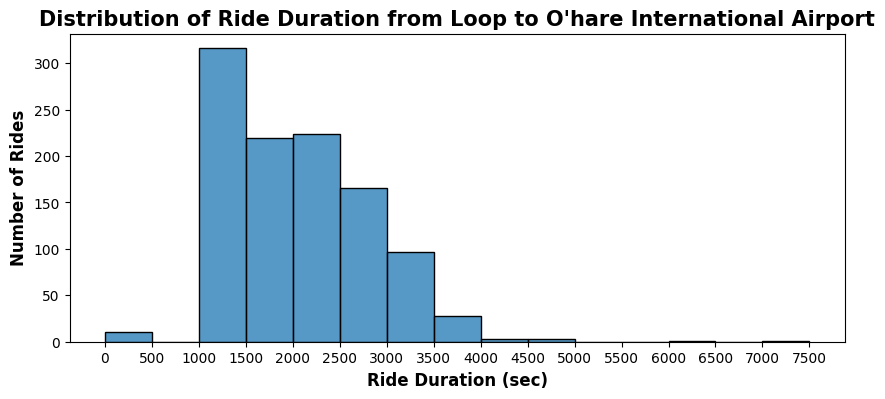

In [14]:
# Plot histogram of duration_seconds - 1068 values
plt.figure(figsize = (10,4))

sns.histplot(data = trip_data,
             x = 'duration_seconds',
             bins = range(min(trip_data['duration_seconds']),     # min in range 
                          max(trip_data['duration_seconds']+500), # max in range
                          500)                                    # step by
             )

plt.title('Distribution of Ride Duration from Loop to O\'hare International Airport', fontsize = 15, fontweight = 'bold')
plt.xlabel('Ride Duration (sec)', fontsize = 12, fontweight = 'bold')
plt.xticks(range(0, max(trip_data['duration_seconds'] +500), 500))
plt.ylabel('Number of Rides', fontsize = 12, fontweight = 'bold')
plt.show()

Let's take a look at the data at less than or equal to 1000 seconds

In [15]:
trip_data.query("duration_seconds < 1000")

,start_ts,weather_conditions,duration_seconds
15,2017-11-25 13:00:00,Good,60
163,2017-11-11 09:00:00,Good,0
168,2017-11-11 07:00:00,Good,0
203,2017-11-18 00:00:00,Bad,480
204,2017-11-18 19:00:00,Good,0
424,2017-11-11 13:00:00,Good,420
552,2017-11-04 01:00:00,Good,0
801,2017-11-04 09:00:00,Good,0
860,2017-11-04 18:00:00,Bad,480
1063,2017-11-25 11:00:00,Good,0


It is clear from the histogram that rides less than 1000 seconds (approximately 16 mins) are anomalous. Let's find the percentage of rides that are less than 500 seconds.

In [16]:
percentage = (trip_data.query("duration_seconds < 500").shape[0] / trip_data.shape[0])
print("The percentage of trips with a travel time less than 500 seconds including cancelled trips(trips with a duration of 0 seconds):",
     f"{percentage:.2%}")

The percentage of trips with a travel time less than 500 seconds including cancelled trips(trips with a duration of 0 seconds): 0.94%


Since this accounts for less than 1% of the entire dataset, these records will be dropped. 

In [17]:
# Drop records with duration_seconds < 500 from trip_data
trip_data = trip_data.query("duration_seconds > 500")
trip_data.shape

(1058, 3)

[Back to Contents](#contents)

## Exploratory Data Analysis (EDA) ##
<a id='eda'></a>
________________________________________________________________________________________________________________________________

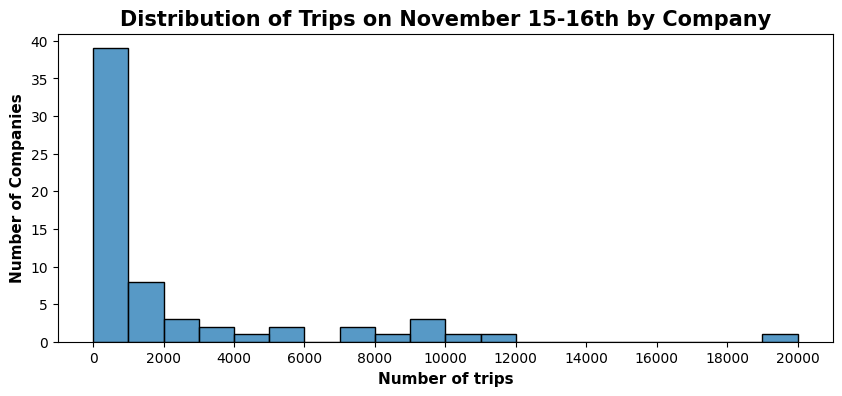

In [18]:
# Plot a histogram of the number of trips per company (company_data)
plt.figure(figsize = (10,4))

sns.histplot(data = company_data,
             x = 'trips_amount',
             bins = range(0,
                          max(company_data['trips_amount'] + 500),
                          1000)
            )

plt.title("Distribution of Trips on November 15-16th by Company", fontsize = 15, fontweight = 'bold')
plt.xlabel("Number of trips", fontsize = 11, fontweight = 'bold')
plt.xticks(range(0, max(company_data['trips_amount']) + 500, 2000))
plt.ylabel("Number of Companies", fontsize = 11, fontweight = 'bold')
plt.show()

From the histogram we can see that the distribution of the number of rides on November 15-16th is heavily skewed to the right as most companies had less than 1000 rides these two days. There were a few companies with more than 10,000 rides and the most popular being well ahead at nearly the 20,000 mark.

### Top 10 Companies in Chicago ###
<a id='top_10'></a>

In [19]:
top_10_ch = company_data.sort_values(by = 'trips_amount', ascending = False).head(10)
top_10_ch

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [20]:
# Create function to apply ranking
def assign_ranks(data, column):
    """
    This function creates a new column that applies a ranking to a dataframe (data)
    based on the column defined (column).
    """
    # sort the data
    sorted_data = data.sort_values(by = column, ascending = False).reset_index(drop = True)
    
    # Add the rank column
    sorted_data['rank'] = sorted_data[column].rank(ascending = False, method = 'dense').astype('int')
    
    # Apply label based on ranking
    def rank_category(rank):
        if rank <= 10:
            return 'Top 10'
        elif rank <= 20:
            return 'Top 11-20'
        else:
            return 'Others'
        
    # apply rank function
    sorted_data['rank_category'] = sorted_data['rank'].apply(rank_category)
    
    # Drop the 'rank' column so only category remains
    sorted_data = sorted_data.drop(columns=['rank'])
    
    return sorted_data

In [21]:
ranked_company = assign_ranks(company_data, 'trips_amount')
ranked_company.head()

,company_name,trips_amount,rank_category
0,Flash Cab,19558,Top 10
1,Taxi Affiliation Services,11422,Top 10
2,Medallion Leasin,10367,Top 10
3,Yellow Cab,9888,Top 10
4,Taxi Affiliation Service Yellow,9299,Top 10


In [22]:
ranked_company.tail()

,company_name,trips_amount,rank_category
59,4053 - 40193 Adwar H. Nikola,7,Others
60,2733 - 74600 Benny Jona,7,Others
61,5874 - 73628 Sergey Cab Corp.,5,Others
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3,Others
63,3556 - 36214 RC Andrews Cab,2,Others


In [23]:
# Create function to graph pie chart and bar chart
def plot_charts(data , column: str, pie_title: str, bar_y_label: str, bar_title: str, bar_xlabel: str):
    """
    Plots a pie and bar chart based on the given DataFrame, column, and title.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to be plotted.
    pie_title (str): The title of the pie chart.
    bar_y_label (str): is the y parameter of sns.barplot; it does need to match the column name format
    bar_title (str): The title of the bar chart
    bar_xlabel(str): The x-axis label for the bar chart
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))
    
    # Pie chart
    category_sums = data.groupby('rank_category')[column].sum()

    ax1.pie(category_sums,
            labels = category_sums.index,
            autopct = '%1.2f%%',
            startangle = 120,
            colors=['#008080','#FF7F50', '#D3D3D3'])

    ax1.set_title(pie_title, fontweight = 'bold')
    
    # Bar Chart
    sns.barplot(data = data.head(10),
                x = column,
                y = bar_y_label,
                ax=ax2)

    ax2.set_title(bar_title, fontweight = 'bold', fontsize = 13)
    ax2.set_xlabel(bar_xlabel, fontweight = 'bold')
    ax2.set_ylabel(bar_y_label.replace('_', ' ').title(), fontweight = 'bold')

    plt.tight_layout()
    plt.show()

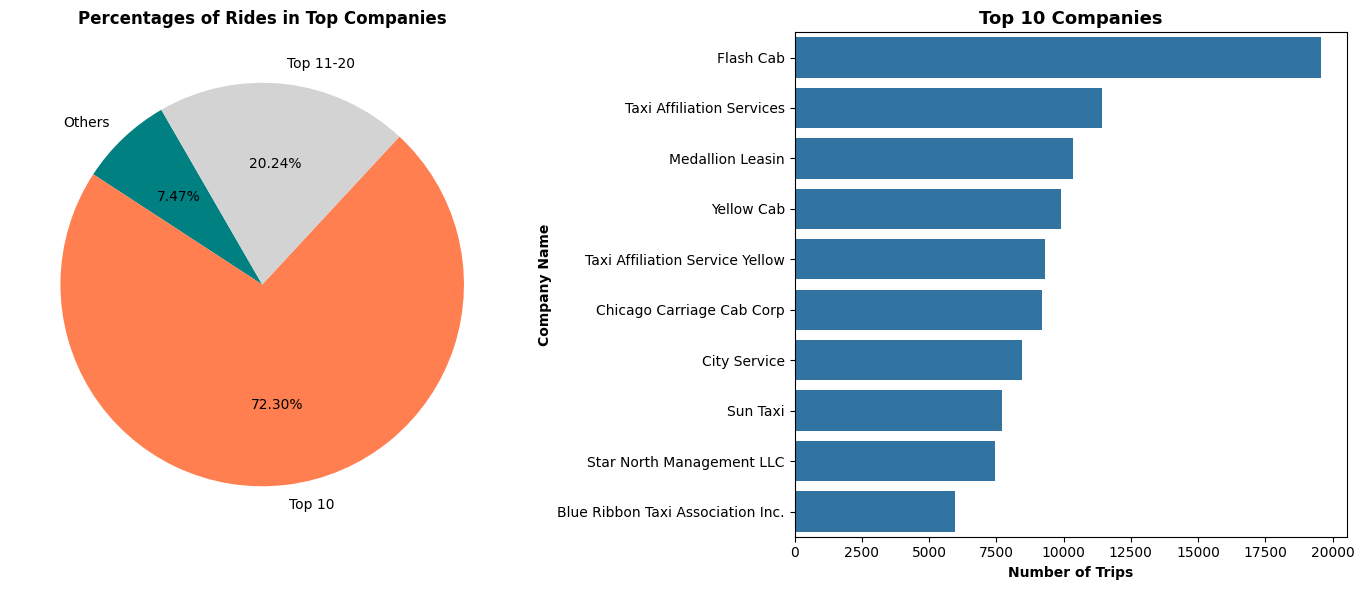

In [24]:
plot_charts(ranked_company, 'trips_amount', 'Percentages of Rides in Top Companies',
            'company_name', 'Top 10 Companies', 'Number of Trips')

The pie chart shows that the top 10 companies account for 72.3% of the total number of trips from November 15-16th in Chicago. 

The bar chart is a summary of those top 10 companies. `Flash Cab` remarkably stands out as the preferred Ride-service compared to the other companies. 

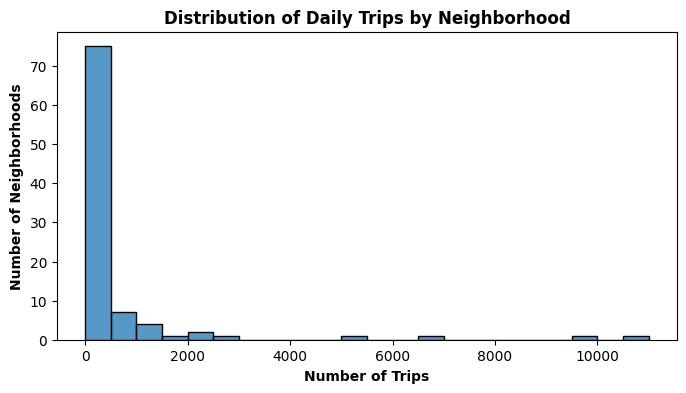

In [25]:
# Plot a distribution of daily trips per neighborhood
plt.figure(figsize = (8, 4))

sns.histplot(data = dropoff_data,
             x = 'average_trips',
             bins = range(0,
                          max(dropoff_data['average_trips'] + 500),
                          500))

plt.title("Distribution of Daily Trips by Neighborhood", fontweight = 'bold')
plt.xlabel("Number of Trips", fontweight = 'bold')
plt.ylabel("Number of Neighborhoods", fontweight = 'bold')
plt.show()

The distribution of daily trips by neighborhood is also severely skewed right. In November of 2017, the majority of neighborhoods recorded a low number of trips, while a small number of neighborhoods had more than 4000 trips end in them per day. 

[Back to Contents](#contents)

### Top 10 Visited Neighborhoods in Chicago ###
<a id='10_visits'></a>

In [26]:
top_10_nebs = dropoff_data.sort_values(by = 'average_trips', ascending = False).head(10)
top_10_nebs

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


The table above displays the top 10 neighborhoods in terms of drop-offs. We can see that the `Loop` and `River North` neighborhoods stand out above the rest as the most visited neighborhoods. Let's take a look at some distributions similar to how we broke down the trips by company, we will now break down by neighborhood.

In [27]:
# Apply the rank function
ranked_nebs = assign_ranks(dropoff_data, 'average_trips')
ranked_nebs.head()

,dropoff_location_name,average_trips,rank_category
0,Loop,10727,Top 10
1,River North,9524,Top 10
2,Streeterville,6665,Top 10
3,West Loop,5164,Top 10
4,O'Hare,2547,Top 10


In [28]:
ranked_nebs.tail()

,dropoff_location_name,average_trips,rank_category
89,Mount Greenwood,3,Others
90,Hegewisch,3,Others
91,Burnside,2,Others
92,East Side,2,Others
93,Riverdale,2,Others


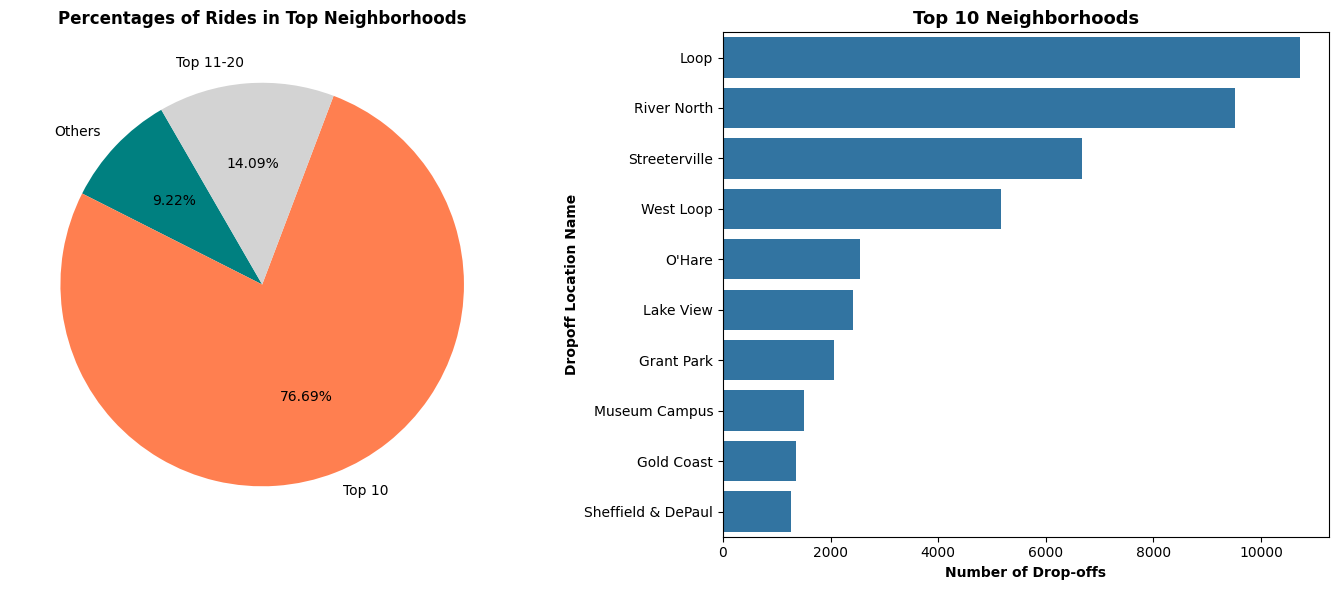

In [29]:
# Plot subplot with pie chart and bar chart with function
plot_charts(ranked_nebs, 'average_trips', 'Percentages of Rides in Top Neighborhoods',
            'dropoff_location_name', 'Top 10 Neighborhoods', 'Number of Drop-offs')

According to the pie chart, the top 10 neighborhoods contained 76.69% of all drop-offs. The bar chart is a summary of the top 10 companies; we can see that `Loop` and `River North` are the two most popular drop-off locations. After that, `Streeterville` and `West Loop` are still twice as popular as those below them. 

[Back to Contents](#contents)

## Hypothesis Testing ##
<a id='h_testing'></a>

Our objective is to test the following hypothesis: 
 - **The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays**

In [30]:
# Use hypothesis function for ease of hypothesis testing (from Project 5 w/ slight mods) 
def calc_stats(df, group, group_items, variable, show_stats=True, 
               show_hist = False, run_levene=False, run_test=False, equal_var=True, alpha = 0.05):
    """
    This function will calculate the mean, variance, and standard deviation of a variable for two groups.
    
    Parameters:
    df (DataFrame)     - The dataframe containing the data to perform calculations with
    group (str)        - The column you want to group the data by
    group_items (list) - The list of items you want to perform the testing between: should be two variables for our purposes
    variable (str)     - The column name representing the variable for which to calculate the statistics
    show_stats (bool)  - Lets the function know whether you just want statistics or if false, 
                            then it will produce graphs for the two variables
    show_hist (bool)   - Set to true if you want to display histograms between two groups
    run_levene (bool)  - Set to true to run Levene Test on variances
    equal_var (bool)   - Set to false if variances are not equal from Levene Test
    alpha
    
    This function will return a series of strings that contains the 3 statistics for each group
    """
    
    # Filter the data for each group and drop any missing values; creates series objects
    data_0 = df[df[group] == group_items[0]][variable].dropna()
    data_1 = df[df[group] == group_items[1]][variable].dropna()
    
    # Calculate statistics for the first group
    count_0 = data_0.count()
    mean_0 = np.mean(data_0)
    var_0 = np.var(data_0, ddof=1) #ddof=1 is the sample variance
    std_0 = np.std(data_0, ddof=1)
    
    # Calculate statistics for the second group
    count_1 = data_1.count()
    mean_1 = np.mean(data_1)
    var_1 = np.var(data_1, ddof=1)
    std_1 = np.std(data_1, ddof=1)
    
    if show_stats: # get stats with no graphs
        
        #print the results
        print(f"Number of {variable} in {group_items[0]}: {count_0}")
        print(f"Mean of {variable} in {group_items[0]}: {mean_0:.2f}")
        print(f"Variance of {variable} in {group_items[0]}: {var_0:.4f}")
        print(f"Standard deviation of {variable} in {group_items[0]}: {std_0:.4f}")
        print("_"*53, "\n")
        print(f"Number of {variable} in {group_items[1]}: {count_1}")
        print(f"Mean of {variable} in {group_items[1]}: {mean_1:.2f}")
        print(f"Variance of {variable} in {group_items[1]}: {var_1:.4f}")
        print(f"Standard deviation of {variable} in {group_items[1]}: {std_1:.4f}")
        print("_"*53, "\n")
        print(f"The ratio of the two variances is {var_0 / var_1:.4f}")

    # This section of the function will produce two histograms for the two groups to confirm normal distributions
    # as well as test if variances are equal via Levene's Test
    if show_hist: 
        
        # Set up figure
        sns.set_style('whitegrid')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
        
        # Plot the histograms
        sns.histplot(data = data_0, bins = rices_rule(count_0), 
                     kde = True, color = 'skyblue', ax = ax1)
        
        sns.histplot(data = data_1, bins = rices_rule(count_1), 
                     kde = True, color = 'lightcoral', ax = ax2)
        
        # Establish parameters
        fig.suptitle("Distribution of the Two Samples", fontsize = 15, fontweight = 'bold')
        
        ax1.set_title(f"Sample 1: {group_items[0]} Weather Conditions", fontsize = 12, fontweight = 'bold')
        ax1.set_xlabel("Duration of Ride (sec)", fontweight = 'bold')
        ax1.set_ylabel(f"Number of Rides", fontweight = 'bold')
        
        ax2.set_title(f"Sample 2: {group_items[1]} Weather Conditions", fontsize = 12, fontweight = 'bold')
        ax2.set_xlabel("Duration of Ride (sec)", fontweight = 'bold')
        ax2.set_ylabel(f"Number of Rides", fontweight = 'bold')
        
        plt.show()
        
    if run_levene: # Levene Test
        
        levene_result = st.levene(data_0, data_1, center = 'median')
        
        # Show levene result
        print("\n\033[1mLevene Test for Equal Variances:\033[0m")
        print("Null hypothesis: Variances between these two samples is the same.")
        print("Significance level: 0.05")
        print()
        print("p-value: ", levene_result.pvalue)
        
        if levene_result.pvalue < 0.05:
            print("We reject the null hypothesis. We cannot assume the variances are equal.\n")
        else:
            print("We failed to reject the null hypothesis. We can assume the variances are the same.\n")
    
    if run_test: #t-test
        t_result = st.ttest_ind(data_0, data_1, equal_var = equal_var)
        print("\n\033[1mPerforming t-test:\033[0m")
        print('p-value', t_result.pvalue)
        
        if t_result.pvalue < alpha:
            print("We reject the null hypothesis.\n")
        else:
            print("We fail to reject the null hypothesis.\n")

In [31]:
def rices_rule(n: int):
    """
    Calculates the number of bins to be used in a histogram based on Rice's Rule.
    
    Parameters:
    n (int): The number of data points.
    
    Returns:
    int: The number of bins.
    """
    return int(np.ceil(2 * n**(1/3)))

In [32]:
calc_stats(trip_data, 'weather_conditions', ['Good', 'Bad'], 'duration_seconds')

Number of duration_seconds in Good: 880
Mean of duration_seconds in Good: 2017.31
Variance of duration_seconds in Good: 546902.4846
Standard deviation of duration_seconds in Good: 739.5286
_____________________________________________________ 

Number of duration_seconds in Bad: 178
Mean of duration_seconds in Bad: 2449.08
Variance of duration_seconds in Bad: 482848.6878
Standard deviation of duration_seconds in Bad: 694.8731
_____________________________________________________ 

The ratio of the two variances is 1.1327


Let the population mean of duration of rides for `Good` weather be $\mu_1$.

Let the population mean of duration of rides for `bad` weather be $\mu_2$.

Let the null hypothesis be $H_0$.

Let the alternate hypothesis be $H_1$

**Sample 1: Good Weather**
- Sample size: $n_1$ = 880
- Sample mean $\bar{x_1}$ = 2017.31 seconds
- Sample standard deviation $s_1$ =m 739.5286 seconds

**Sample 2: Bad Weather**
- Sample size: $n_2$ = 178
- Sample mean $\bar{x_2}$ = 2449.08 seconds
- Sample standard deviation $s_2$ = 694.8731 seconds

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1 \neq \mu_2$

The two samples are independent and we are testing if their means differ, so we will use a two-sample t-test. 

In order to perform a two-sample t-test, we assume that both samples follow a normal distribution - a histogram will be plotted for each sample to confirm. 

The ratio of the sample variances is 1.1327, which is close to 1, so we can assume that their variances are equal, but we will perform a Levene test to confirm. 

Performing this test, we will use a significance level of 0.05

$\alpha$ = 0.05

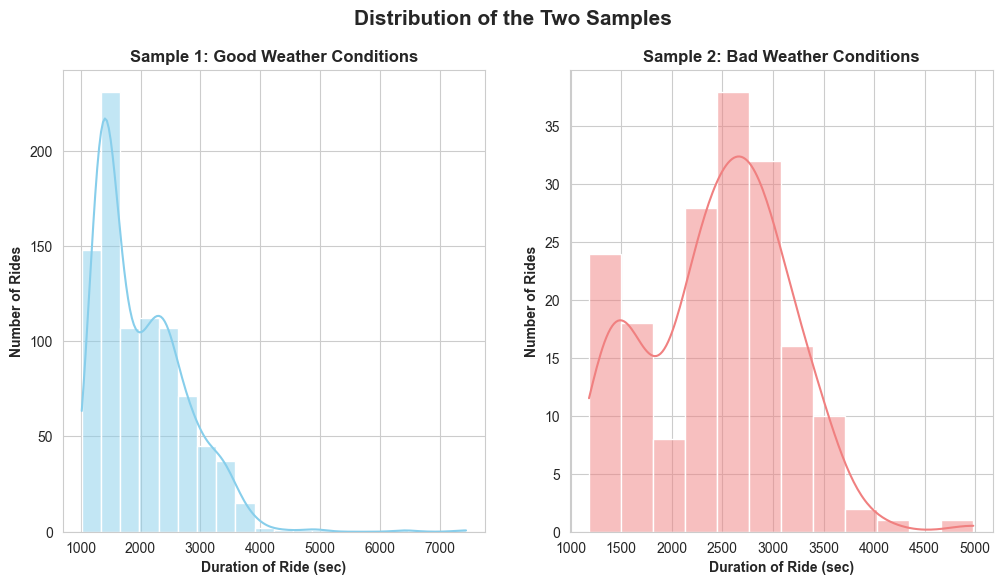

In [33]:
# Plot histograms using automation
calc_stats(trip_data, 'weather_conditions', ['Good', 'Bad'], 'duration_seconds',
           show_stats = False,
           show_hist = True)

These two distributions do not appear inititally to be perfectly normal, the `good weather conditions` more so than the `bad weather conditions`. However, with a larger sample size of more than 30, and applying the central limit theorem, the sample mean distribution tendds to be normal, and we can continue with the t-test. However, in future scenarios, or if the distributions were more wildly non-normal, some additional tests may need to be ran for normality, but for the purposes of this project, let's assume normality based on these histograms. 

In [34]:
# Run levene test
calc_stats(trip_data, 'weather_conditions', ['Good', 'Bad'], 'duration_seconds',
           show_stats = False,
           show_hist = False,
           run_levene = True)


Levene Test for Equal Variances:
Null hypothesis: Variances between these two samples is the same.
Significance level: 0.05

p-value:  0.4248043185773904
We failed to reject the null hypothesis. We can assume the variances are the same.



In [35]:
# Run t-test
calc_stats(trip_data, 'weather_conditions', ['Good', 'Bad'], 'duration_seconds',
           show_stats = False,
           show_hist = False,
           run_levene = False,
           run_test = True,
           equal_var = True,
           alpha = 0.05)


Performing t-test:
p-value 1.3603319763146637e-12
We reject the null hypothesis.



Since the p-value is less than our significance level of 0.05, we reject the null hypothesis $H_0$. We have enough evidence to conclude that the ride durations during Good and Bad weather conditions are significantly different. While inititally upon reflecting on whether these two means would be different, I assume they wouldn't be, because I would think in a large city, overall, people need to get where they are going, regardless of the weather, so it's interesting to see that the opposite is true. That during bad weather conditions, while there are less ride data, there is a higher frequency of longer rides when comparing to good weather conditions. Interesting stuff!

[Back to Contents](#contents)

## Conclusion ##
<a id='conclusion'></a>

### Data Exploration and Cleaning ###
By using available online weather information and the databases created in the sql portion of this project, we had sufficient data to conduct the relevant analysis and test the hypothesis. However, there were several issues that we addressed: 
- Rounded `average_trips` and changed to `int`
- Converted `duration_seconds` to `int`
- Converted `start_ts` to datetime
- Investigated the 197 duplicate rows in `trip_data` and determined we did not have enough evidence to drop them.
- Investigated the 0-second rides and found that there was a small percentage of rides with a duration less than 500 seconds, and so we removeed those. 

### Exploratory Analysis ### 
Summary of findings are:
- The top 10 companies account for 72.3% of the total number of trips. The top company is `Flash Cab`.
- The top 10 neighborhoods accounted for 76.7% of daily trips. The top four neighborhoods are `Loop`, `River North`, `Streeterville`, and `West Loop`.

### Hypothesis Testing ###
Hypothesis: The average duration of rides from the `Loop` to `O'Hare` International Airport changes on rainy Saturdays.

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1 \neq \mu_2$

Significance level: $\alpha$ = 0.05

After conducting the test, we have the following result: 

**Since the p-value is less than our significance level, we reject the null hypothesis $H_0$. We have enough evidence to conclude that the durations of rides during the good and bad weather conditions are significantly different.** 

[Back to Contents](#contents)